In [1]:
import metnum
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, clear_output
from tqdm.notebook import tnrange, tqdm

In [78]:
df_train = pd.read_csv("../data/train.csv")
df_prueba = df_train.sample(1000)
X_train = df_prueba[df_prueba.columns[1:]].values
y_train = df_prueba["label"].values

In [9]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, recall_score, precision_score
from time import time


def knn_K(k, K, X, y):
    k_fold = KFold(n_splits=K)
    k_fold.get_n_splits(X)

    accs, tiempos, kappas, f1_scores, recalls, precision = ([] for i in range(6))

    #Se va variando la particion con la que se testea del K-Fold
    for train_index, test_index in k_fold.split(X):
        # Separamos el conjunto de entrenamiento y el conjunto de test
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        cl = metnum.KNNClassifier(k)

        time_start = time()
        cl.fit(X_train, y_train)
        y_pred = cl.predict(X_test)

        time_end = time()

        accs.append(accuracy_score(y_test, y_pred))
        tiempos.append(time_end - time_start)
        kappas.append(cohen_kappa_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, average="macro"))
        recalls.append(recall_score(y_test, y_pred, average="macro"))
        precision.append(precision_score(y_test, y_pred, average="macro"))

        

    accs = np.asarray(accs)
    tiempos = np.asarray(tiempos)
    kappas = np.asarray(kappas)
    f1_scores = np.asarray(f1_scores)
    recalls = np.asarray(recalls)
    precisions= np.asarray(precision) 

    return [accs,
            tiempos,
            kappas,
            f1_scores,
            recalls,
            precisions]


# Probemos los k

In [ ]:
# df_train_prueba = df_train.sample(1000)
# X_train = df_train_prueba[df_train_prueba.columns[1:]].values
# y_train = df_train_prueba["label"].values

In [ ]:
k_list = np.arange(1, 50)
K = 10

accs = []
tiempos = []
kappas = []
f1_scores = []
recalls = []
presicion = []
var_tiempo = []

for k in tqdm(k_list):
    ans = knn_K(int(k), K, X_train, y_train)

    accs.append(ans[0].mean())
    tiempos.append(ans[1].mean())
    var_tiempo.append(ans[1].std())
    kappas.append(ans[2].mean())
    f1_scores.append(ans[3].mean())
    recalls.append(ans[4].mean())
    presicion.append(ans[5].mean())


In [ ]:
plt.plot(k_list, presicion) and plt.plot(k_list, accs) and plt.plot(k_list, recalls)
plt.grid()
plt.xlabel("k neighbours")
plt.ylabel("")
plt.legend(['Presicion','Acurracy','Recall'])
plt.savefig("images/full-con-k.png")
plt.show()

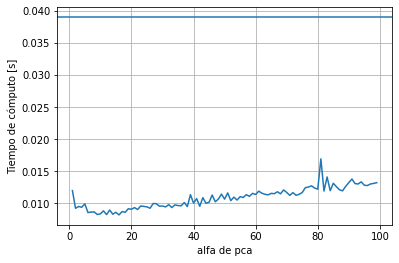

In [40]:
plt.figure("Tiempos con k")
plt.errorbar(k_list, tiempos, yerr=var_tiempo, fmt='-o', ecolor='red')
plt.grid()
plt.xlabel("k neighbours")
plt.ylabel("Tiempo de cómputo [s]")
plt.savefig("images/tiempos-con-k-var.png")
plt.show()

In [ ]:
# k = 5
# K = 10
# alpha_list = np.arange(1, 50)

# accs = []
# tiempos = []
# kappas = []
# f1_scores = []
# recalls = []
# presicion = []

# for alpha in tqdm(alpha_list):

#     time_start = time()

#     pca = metnum.PCA(int(alpha))
#     pca.fit(X_train)

#     X_trans = pca.transform(X_train)
#     time_end = time()

#     tiempos.append(time_start - time_end)
    
#     ans = knn_K(k, K, X_trans, y_train)
    
#     accs.append(ans[0].mean())
#     tiempos.append(ans[1].mean())
#     kappas.append(ans[2].mean())
#     f1_scores.append(ans[3].mean())
#     recalls.append(ans[4].mean())
#     presicion.append(ans[5].mean())

In [4]:
from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554
X_all, Y_all = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# lo convierto a int
Y_all = Y_all.astype(int)
X_all = X_all.astype(int)

X_train, X_test  = X_all[:40000],X_all[-2000:]
y_train, y_test  = Y_all[:40000],Y_all[-2000:]


In [9]:
k = 5
alpha=600

pca = metnum.PCA(alpha)

time_start = time()
pca.fit(X_train)
time_end = time()

AAA = pca.get_transformacion()
np.save('pca_40000_600',AAA)

time_passed=time_end-time_start
print(time_passed)


In [ ]:
# cl = metnum.KNNClassifier(k)
# cl.fit(X_trans, y_train)

# y_pred = cl.predict( X_test_trans )

In [38]:
pca = np.load("pca_40000_600.npy")
alfa_list = np.arange(1, 100)
K = 10
k = 5

accs = []
tiempos = []
kappas = []
f1_scores = []
recalls = []
presicion = []

p = metnum.PCA(100)

for a in tqdm(alfa_list):
    p.set_transformacion(pca[:,:a])
    ans = knn_K(k, K, p.transform(X_train), y_train)

    accs.append(ans[0].mean())
    tiempos.append(ans[1].mean())
    kappas.append(ans[2].mean())
    f1_scores.append(ans[3].mean())
    recalls.append(ans[4].mean())
    presicion.append(ans[5].mean())

  0%|          | 0/99 [00:00<?, ?it/s]

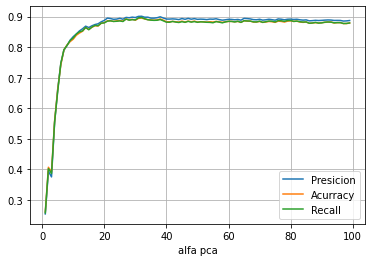

In [39]:
plt.plot(alfa_list, presicion) and plt.plot(alfa_list, accs) and plt.plot(alfa_list, recalls) 
plt.grid()
plt.xlabel("alfa pca")
plt.ylabel("")
plt.legend(['Presicion','Acurracy','Recall'])
plt.savefig("images/full-con-k.png")
plt.show()


In [ ]:
plt.figure("Tiempos con alfa") 
plt.plot(alfa_list, tiempos) #and plt.axhline(y=162)
plt.grid()
plt.xlabel("alfa de pca")
plt.ylabel("Tiempo de cómputo [s]")
plt.savefig("images/tiempos-con-alfa.png")
plt.show()

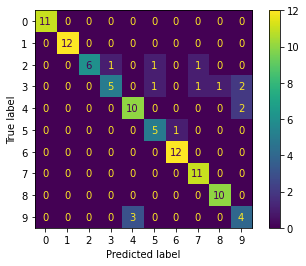

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pca = np.load("pca_40000_600.npy")
k=5
p = metnum.PCA(20)
p.set_transformacion(pca[:,:20])
predict_k = metnum.KNNClassifier(k)
predict_k.fit(p.transform(X_train),y_train)
p_y_k = predict_k.predict(p.transform(X_test))
confucion = confusion_matrix(y_test, p_y_k) 
display = ConfusionMatrixDisplay(confucion)
display.plot()
plt.savefig("images/confusion_40000_pca.png")

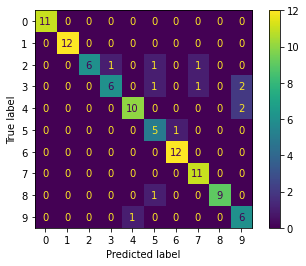

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

k=5

predict_k = metnum.KNNClassifier(k)
predict_k.fit(X_train,y_train)
p_y_k = predict_k.predict(X_test)
confucion = confusion_matrix(y_test, p_y_k) 
display = ConfusionMatrixDisplay(confucion)
display.plot()
accuracy_score(y_test, p_y_k)
plt.savefig("images/confusion_40000.png")



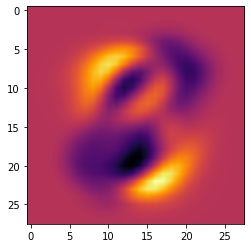

In [72]:
#plt.imshow(pca[:,:1].reshape(28,28),interpolation ='bilinear')
#plt.savefig("images/cerito.png")
